![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 13 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure

### <span style="color:black">Exercici 1.</span>

__Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python:__ <span style="color:blue">__[X] Fet__</span>

In [2]:
# Importamos el mysql conector

import mysql.connector

In [3]:
# Nos conectamos a la base de datos 'ventas' creada en cmd con usuario 'root'

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database="ventas"
)

print(mydb)

In [4]:
# visualizamos las tablas creadas en la DB 'ventas'.

mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('cliente',)
('comercial',)
('pedido',)


In [ ]:
# adjunto la estructura de las 3 tablas creadas.

![img](Tabla_Cliente.jpg)

![img](Tabla_Comercial.jpg)

![img](Tabla_Pedido.jpg)

### <span style="color:black">Exercici 2.</span>

__Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# Devuelve todos los datos de los dos pedidos de mayor valor

In [9]:
mycursor = mydb.cursor()

sql = "SELECT * FROM pedido order by total DESC limit 2"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)


(7, 5760.0, datetime.date(2015, 9, 10), 2, 1)
(12, 3045.6, datetime.date(2017, 4, 25), 2, 1)


In [ ]:
# Devuelve un listado con el nombre y los apellidos de los comerciales que tienen una comisión entre 0.05 y 0.11. 

In [10]:
mycursor = mydb.cursor()

sql = "SELECT nombre, apellido1, apellido2 FROM comercial where comision between 0.05 and 0.11"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)


('Diego', 'Flores', 'Salas')
('Antonio', 'Vega', 'Hernández')
('Alfredo', 'Ruiz', 'Flores')


In [ ]:
# Devuelve un listado (ordenado alfabeticamente) con el nombre y los apellidos de todos los clientes que han realizado algún 
# pedido, eliminando los elementos repetidos.

In [12]:
mycursor = mydb.cursor()

sql = "SELECT DISTINCT nombre, apellido1, apellido2 FROM cliente C JOIN pedido P ON C.id=P.id_cliente ORDER BY apellido1, apellido2, nombre ASC"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Marcos', 'Loyola', 'Méndez')
('Aarón', 'Rivero', 'Gómez')
('Adolfo', 'Rubio', 'Flores')
('Pilar', 'Ruiz', None)
('Pepe', 'Ruiz', 'Santana')
('Adela', 'Salas', 'Díaz')
('María', 'Santana', 'Moreno')
('Adrián', 'Suárez', None)


In [ ]:
# Devuelve un listado que solamente muestre los clientes que no han realizado ningún pedido. 

In [31]:
mycursor = mydb.cursor()

sql = "Select nombre, apellido1, apellido2, total, fecha FROM cliente C LEFT JOIN pedido P ON C.id=id_cliente where P.id IS NULL;"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Guillermo', 'López', 'Gómez', None, None)
('Daniel', 'Santana', 'Loyola', None, None)


In [ ]:
# Devuelve el nombre de todos los clientes que han realizado algún pedido con el comercial Daniel Sáez Vega.

In [15]:
mycursor = mydb.cursor()

sql = "SELECT DISTINCT cl.nombre, cl.apellido1, cl.apellido2 FROM comercial co INNER JOIN pedido p ON (co.id=p.id_comercial) INNER JOIN cliente cl ON (cl.id=p.id_cliente) WHERE co.nombre='Daniel' AND co.apellido1='Sáez' AND co.apellido2='Vega';"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Adela', 'Salas', 'Díaz')
('Pilar', 'Ruiz', None)
('María', 'Santana', 'Moreno')


### <span style="color:black">Exercici 3.</span>

__Genera algun gràfic que resumeixi les dades:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# Para visualizar un resumer de las 3 tablas que forman parte de nuesta BBDD 'ventas', vamos a realizar 3 gráficos:
    #-Compras por clientes
    #-Ventas por comercial
    #-Performance de los comerciales

Start
End


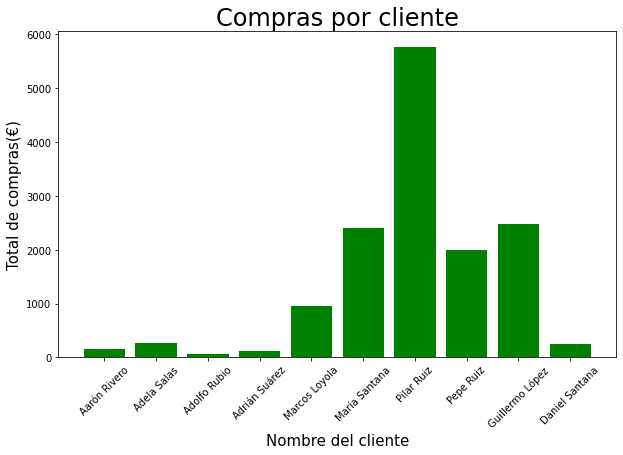

<Figure size 1080x504 with 0 Axes>

In [52]:
def mysql_select_all():
    mydb = mysql.connector.connect(host="localhost", user="root", database='ventas')
    cursor = mydb.cursor()
    sql = "Select concat_ws(' ', nombre, apellido1) as cliente, total FROM cliente C JOIN pedido P ON C.id=P.id GROUP BY C.id"
    cursor.execute(sql)
    result = cursor.fetchall()
    df = pd.DataFrame(list(result),columns=["cliente","total"])
    x = df.cliente
    y = df.total
    plt.title("Compras por cliente", fontsize="24")
    plt.bar(x, y, align='center', color=['green'])
    plt.xticks(rotation=45)
    plt.xlabel("Nombre del cliente", fontsize="15")
    plt.ylabel("Total de compras(€)", fontsize="15")
    plt.figure(figsize=(15,7))
    cursor.close()

print("Start")

mysql_select_all()

print("End")

Start
End


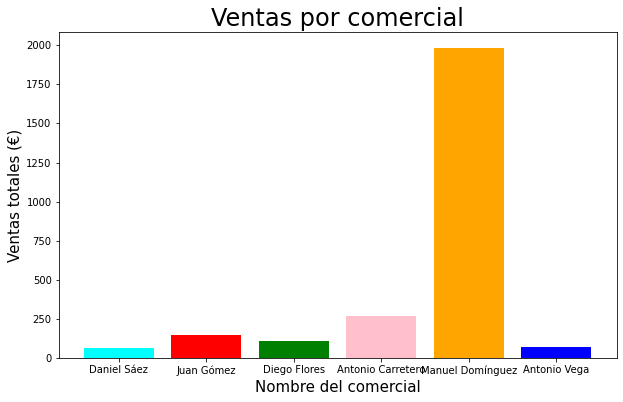

<Figure size 720x504 with 0 Axes>

In [48]:
def mysql_select_all():
    mydb = mysql.connector.connect(host="localhost", user="root", database='ventas')
    cursor = mydb.cursor()
    sql = "Select concat_ws(' ', nombre, apellido1) as comercial, total FROM comercial C JOIN pedido P ON C.id=P.id_comercial GROUP BY C.id"
    cursor.execute(sql)
    result = cursor.fetchall()
    df = pd.DataFrame(list(result),columns=["comercial","total"])
    x = df.comercial
    y = df.total
    plt.title("Ventas por comercial", fontsize="24")
    plt.bar(x, y, align='center', color=['cyan','red','green','pink','orange', 'blue'])
    plt.xlabel("Nombre del comercial", fontsize="15")
    plt.ylabel("Ventas totales (€)", fontsize="15")
    plt.figure(figsize=(10,7))
    cursor.close()

print("Start")

mysql_select_all()

print("End")

Start
End


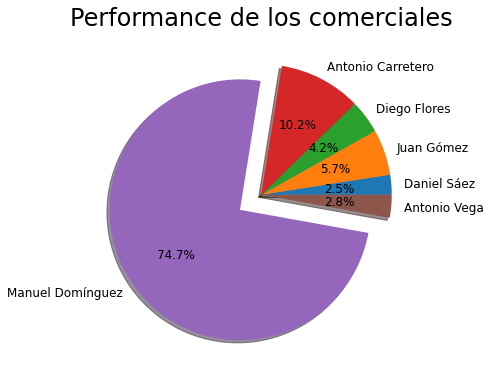

<Figure size 720x504 with 0 Axes>

In [38]:
def mysql_select_all():
    mydb = mysql.connector.connect(host="localhost", user="root", database='ventas')
    cursor = mydb.cursor()
    sql = "Select CONCAT_WS(' ',nombre, apellido1), total FROM comercial C JOIN pedido P ON C.id=P.id_comercial GROUP BY C.id"
    cursor.execute(sql)
    result = cursor.fetchall()
    df = pd.DataFrame(list(result),columns=["Select CONCAT_WS(' ',nombre, apellido1)","total"])
    myexplode = [0, 0, 0, 0, 0.2, 0]
    mylabels = ["Daniel Sáez", "Juan Gómez", "Diego Flores", "Antonio Carretero", "Manuel Domínguez", "Antonio Vega"]
    plt.title("Performance de los comerciales", fontsize="24")
    plt.pie(df.total, labels=mylabels, autopct='%1.1f%%', explode= myexplode, textprops={'fontsize': 12}, shadow=True)
    plt.figure(figsize=(10,7))
    cursor.close()

print("Start")

mysql_select_all()

print("End")